In [1]:
import numpy as np 
import pandas as pd 
import openpyxl
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Dati finali corretti.xlsx', header=1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Response,...,"I miei colleghi hanno competenze idonee a individuare, comprendere e rispondere a eventuali imprevisti e situazioni anomale che possono verificarsi durante le attività lavorative","La mia organizzazione definisce chiaramente e con molta attenzione i compiti, le responsabilità, le competenze e i poteri di ognuno in ambito Sicurezza e Ambiente","Nella mia organizzazione, decisioni importanti come arrestare la produzione a causa dell'insorgere di pericoli immediati per le persone o per l'ambiente non necessitano l'autorizzazione del Responsabile/Preposto",Le procedure di lavoro e le istruzioni operative messe in atto dalla mia organizzazione sono efficaci nel prevenire eventi incidentali e nel gestire i rischi operativi,"Nella mia organizzazione, le conseguenze dei cambiamenti aziendali sulla Sicurezza e Ambiente sono sempre presi in considerazione","Nella mia organizzazione, trovo facile la consultazione e l'accesso alle procedure Sicurezza e Ambiente che mi riguardano",Trovo nelle procedure Sicurezza e Ambiente le informazioni necessarie per svolgere in sicurezza il mio lavoro,"Nella mia organizzazione, le procedure Sicurezza e Ambiente sono aggiornate o riviste tenendo in considerazione gli errori e criticità passate, tanto quanto i successi e i risultati positivi","Nella mia organizzazione, alcune procedure Sicurezza e Ambiente non riflettono il modo in cui la mansione viene effettivamente svolta","Nella mia organizzazione, le procedure Sicurezza e Ambiente sono prodotte e aggiornate tenendo in considerazione le proposte di integrazione o modifica da parte dei lavoratori"
0,119049029971,463348566,2026-02-02 16:39:17,2026-02-02 16:47:25,130.41.117.154,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,4,2,4,3,3,2,3,Non lo so,2,2
1,119044160125,463348566,2026-01-26 12:02:01,2026-01-27 18:16:18,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,5,2,5,2,1 = Totalmente in disaccordo,1 = Totalmente in disaccordo,1 = Totalmente in disaccordo,1 = Totalmente in disaccordo,6 = Totalmente in accordo,2
2,119048894272,463348566,2026-02-02 13:36:46,2026-02-02 14:00:19,130.41.117.152,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,4,4,5,4,3,4,3
3,119048821039,463348566,2026-02-02 10:48:25,2026-02-02 11:51:22,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,5,3,3,3,2,1 = Totalmente in disaccordo,1 = Totalmente in disaccordo,2,2,3
4,119048791961,463348566,2026-02-02 09:28:53,2026-02-02 09:51:52,130.41.117.152,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,2,3,2,5,3,2,1 = Totalmente in disaccordo,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,119058445680,463348566,2026-02-16 10:39:36,2026-02-16 10:42:26,130.41.171.201,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo
2445,119051701452,463348566,2026-02-05 21:27:43,2026-02-05 21:45:22,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6 = Totalmente in accordo,6 = Totalmente in accordo,Non lo so,6 = Totalmente in accordo,6 = Totalmente in accordo,4,5,5,1 = Totalmente in disaccordo,6 = Totalmente in accordo
2446,119050582977,463348566,2026-02-04 15:47:47,2026-02-04 16:01:51,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6 = Totalmente in accordo,6 = Totalmente in accordo,Non lo so,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo,6 = Totalmente in accordo
2447,119045012426,463348566,2026-01-2

In [3]:
master_mapping = {
    # Age/Experience scales
    '< 30 anni': 1, '30 – 50 anni': 2, '> 50 anni': 3,
    '< 3 anni': 1, '3 – 10 anni': 2, '> 10 anni': 3,
    
    # Agreement scales
    '6 = Totalmente in accordo': 6, 
    '1 = Totalmente in disaccordo': 1, 
    'Non lo so': 0
}
inv_map = {v: k for k, v in master_mapping.items()}

# Applica il mapping e risolvi il FutureWarning di Pandas
data = data.replace(master_mapping).infer_objects(copy=False)
# Apply to the entire dataframe regardless of column names
data = data.replace(master_mapping)
data

/tmp/ipykernel_24222/4218041466.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(master_mapping).infer_objects(copy=False)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Response,...,"I miei colleghi hanno competenze idonee a individuare, comprendere e rispondere a eventuali imprevisti e situazioni anomale che possono verificarsi durante le attività lavorative","La mia organizzazione definisce chiaramente e con molta attenzione i compiti, le responsabilità, le competenze e i poteri di ognuno in ambito Sicurezza e Ambiente","Nella mia organizzazione, decisioni importanti come arrestare la produzione a causa dell'insorgere di pericoli immediati per le persone o per l'ambiente non necessitano l'autorizzazione del Responsabile/Preposto",Le procedure di lavoro e le istruzioni operative messe in atto dalla mia organizzazione sono efficaci nel prevenire eventi incidentali e nel gestire i rischi operativi,"Nella mia organizzazione, le conseguenze dei cambiamenti aziendali sulla Sicurezza e Ambiente sono sempre presi in considerazione","Nella mia organizzazione, trovo facile la consultazione e l'accesso alle procedure Sicurezza e Ambiente che mi riguardano",Trovo nelle procedure Sicurezza e Ambiente le informazioni necessarie per svolgere in sicurezza il mio lavoro,"Nella mia organizzazione, le procedure Sicurezza e Ambiente sono aggiornate o riviste tenendo in considerazione gli errori e criticità passate, tanto quanto i successi e i risultati positivi","Nella mia organizzazione, alcune procedure Sicurezza e Ambiente non riflettono il modo in cui la mansione viene effettivamente svolta","Nella mia organizzazione, le procedure Sicurezza e Ambiente sono prodotte e aggiornate tenendo in considerazione le proposte di integrazione o modifica da parte dei lavoratori"
0,119049029971,463348566,2026-02-02 16:39:17,2026-02-02 16:47:25,130.41.117.154,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,4,2,4,3,3,2,3,0,2,2
1,119044160125,463348566,2026-01-26 12:02:01,2026-01-27 18:16:18,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,5,2,5,2,1,1,1,1,6,2
2,119048894272,463348566,2026-02-02 13:36:46,2026-02-02 14:00:19,130.41.117.152,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6,6,6,4,4,5,4,3,4,3
3,119048821039,463348566,2026-02-02 10:48:25,2026-02-02 11:51:22,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,5,3,3,3,2,1,1,2,2,3
4,119048791961,463348566,2026-02-02 09:28:53,2026-02-02 09:51:52,130.41.117.152,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,2,3,2,5,3,2,1,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,119058445680,463348566,2026-02-16 10:39:36,2026-02-16 10:42:26,130.41.171.201,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6,6,6,6,6,6,6,6,6,6
2445,119051701452,463348566,2026-02-05 21:27:43,2026-02-05 21:45:22,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6,6,0,6,6,4,5,5,1,6
2446,119050582977,463348566,2026-02-04 15:47:47,2026-02-04 16:01:51,130.41.117.146,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6,6,0,6,6,6,6,6,6,6
2447,119045012426,463348566,2026-01-27 11:56:27,2026-01-27 12:06:33,130.41.171.201,NaN,NaN,NaN,NaN,Acconsento al trattamento dei dati,...,6,6,6,6,6,6,6,6,1,6


Campione

In [5]:
def get_summary_dataset(subset):
    rows = []
    for col in subset.columns:
        perc = subset[col].value_counts(normalize=True) * 100
        df_row = pd.DataFrame(perc).T
        df_row.index = [col]
        rows.append(df_row)
    
    dataset = pd.concat(rows).fillna(0)
    dataset = dataset.sort_index(axis=1, ascending=True)
    
    # Calcola medie escludendo gli zeri (sostituendoli con NaN)
    medie = subset.apply(pd.to_numeric, errors='coerce').replace(0, np.nan).mean()
    
    dataset['Media'] = medie.round(2)
    dataset['Media_analisi'] = dataset['Media'].mean().round(2)
    
    return dataset


Comunicazione

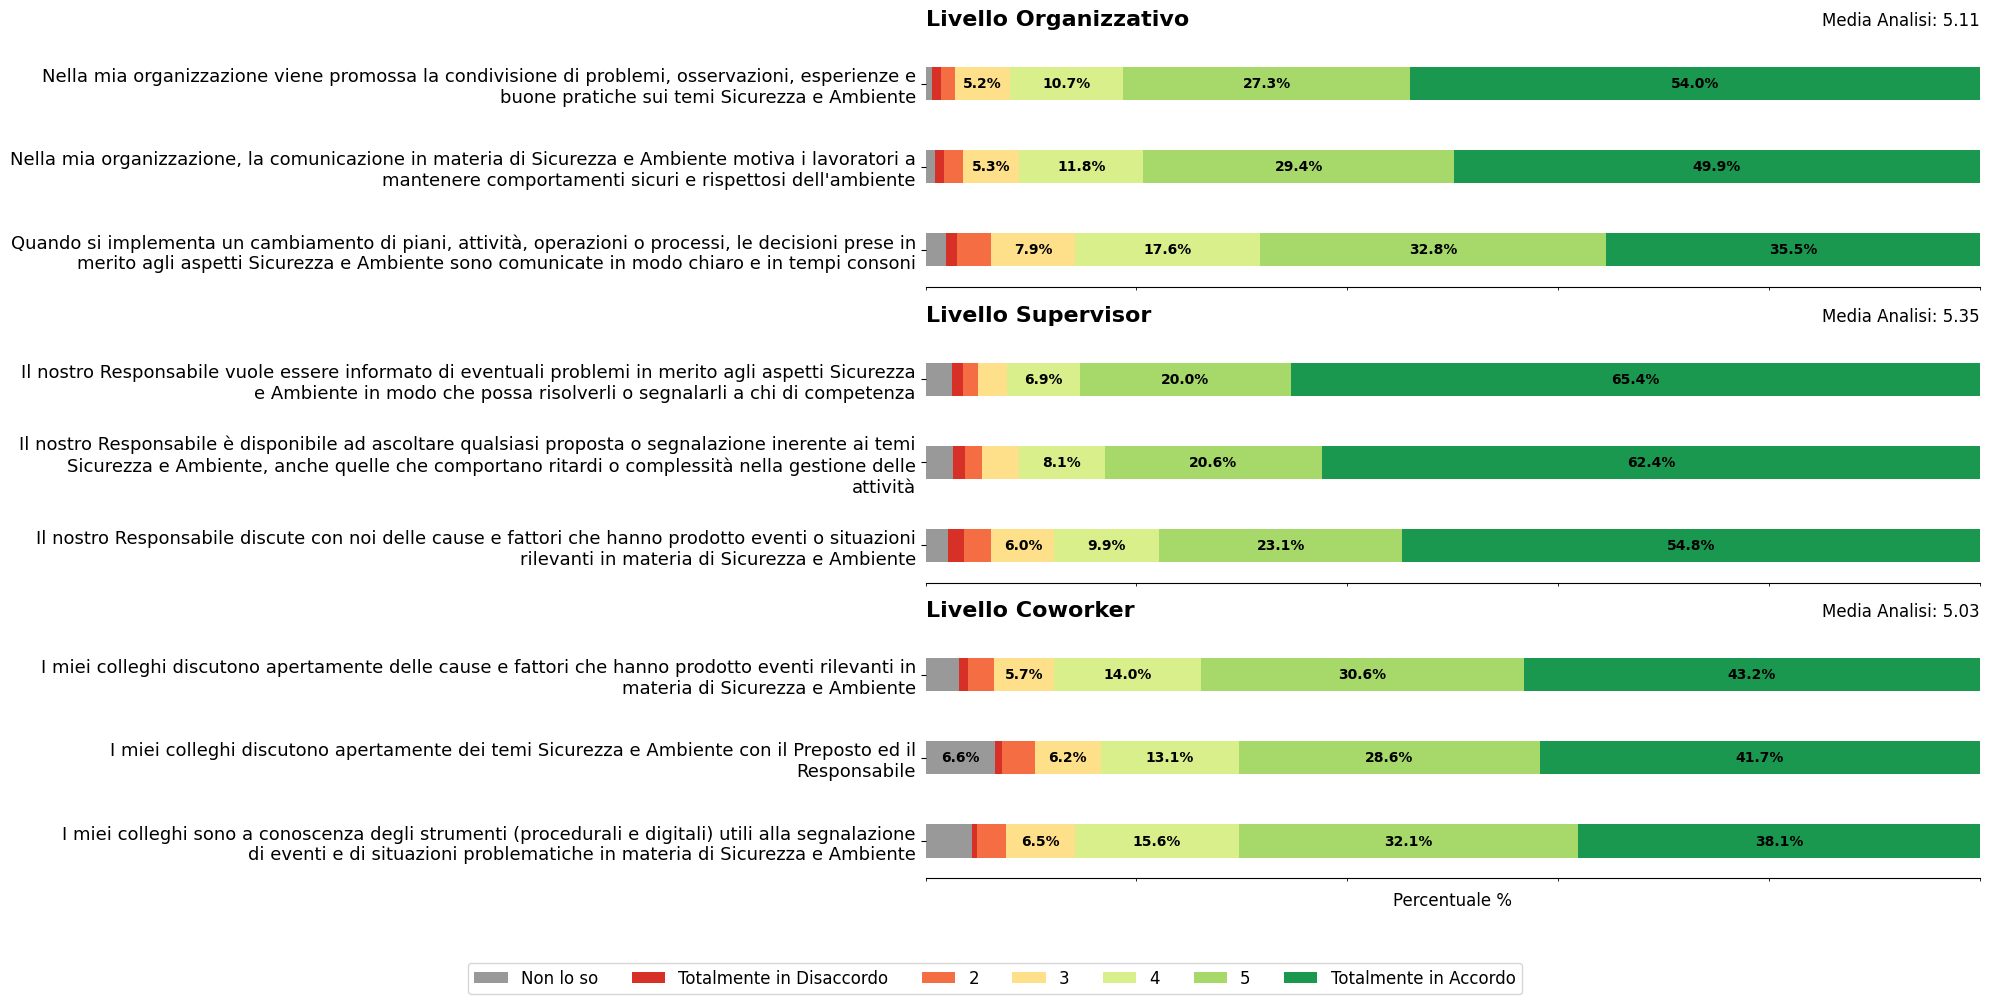

,0,1,2,3,4,5,6,Media,Media_analisi
"Nella mia organizzazione viene promossa la condivisione di problemi, osservazioni, esperienze e buone pratiche sui temi Sicurezza e Ambiente",0.653328,0.816660,1.347489,5.185790,10.698244,27.276439,54.022050,5.26,5.11
"Nella mia organizzazione, la comunicazione in materia di Sicurezza e Ambiente motiva i lavoratori a mantenere comportamenti sicuri e rispettosi dell'ambiente",0.857493,0.857493,1.878318,5.308289,11.759902,29.440588,49.897918,5.19,5.11
"Quando si implementa un cambiamento di piani, attività, operazioni o processi, le decisioni prese in merito agli aspetti Sicurezza e Ambiente sono comunicate in modo chiaro e in tempi consoni",1.919151,1.102491,3.225806,7.880768,17.599020,32.788893,35.483871,4.88,5.11
Il nostro Responsabile vuole essere informato di eventuali problemi in merito agli aspetti Sicurezza e Ambiente in modo che possa risolverli o segnalarli a chi di competenza,2.531646,1.020825,1.429155,2.776644,6.859943,20.008167,65.373622,5.46,5.35
"Il nostro Responsabile è disponibile ad ascoltare qualsiasi proposta o segnalazione inerente ai temi Sicurezza e Ambiente, anche quelle che comportano ritardi o complessità nella gestione delle attività",2.572479,1.184157,1.551654,3.552470,8.125766,20.620661,62.392813,5.39,5.35
Il nostro Responsabile discute con noi delle cause e fattori che hanno prodotto eventi o situazioni rilevanti in materia di Sicurezza e Ambiente,2.082483,1.551654,2.613312,5.961617,9.922417,23.070641,54.797877,5.19,5.35
I miei colleghi discutono apertamente delle cause e fattori che hanno prodotto eventi rilevanti in materia di Sicurezza e Ambiente,3.144140,0.898326,2.449980,5.675786,13.964884,30.624745,43.242140,5.07,5.03
I miei colleghi discutono apertamente dei temi Sicurezza e Ambiente con il Preposto ed il Responsabile,6.574112,0.694161,3.103307,6.247448,13.066558,28.583095,41.731319,5.04,5.03
I miei colleghi sono a conoscenza degli strumenti (procedurali e digitali) utili alla segnalazione di eventi e di situazioni problematiche in materia di Sicurezza e Ambiente,4.409963,0.489996,2.694978,6.533279,15.639036,32.094733,38.138016,4.99,5.03


In [6]:
df_org = get_summary_dataset(data.iloc[:, 22:25]).sort_values(by=6, ascending=False)
df_sup = get_summary_dataset(data.iloc[:, 25:28]).sort_values(by=6, ascending=False)
df_cow = get_summary_dataset(data.iloc[:, 28:31]).sort_values(by=6, ascending=False)

# 2. Definiamo i nomi per la legenda (da 0 a 6)
mappa_nomi = {
    0: 'Non lo so', 
    1: 'Totalmente in Disaccordo', 
    2: '2', 
    3: '3', 
    4: '4', 
    5: '5', 
    6: 'Totalmente in Accordo'
}
colori = ['#999999', '#d73027', '#f46d43', '#fee08b', '#d9ef8b', '#a6d96a', '#1a9850']

piani_grafico = [
    (df_org, "Livello Organizzativo"),
    (df_sup, "Livello Supervisor"),
    (df_cow, "Livello Coworker")
]

import textwrap

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10), sharex=True)

for i, (df, titolo) in enumerate(piani_grafico):
    ax = axes[i]
    
    df_plot = df.iloc[:, :-2].copy()
    

    labels_wrapped = [textwrap.fill(label, width=100) for label in df_plot.index]
    df_plot.index = labels_wrapped

    plot = df_plot.plot(kind='barh', stacked=True, color=colori, ax=ax, legend=False, width=0.4)
    
    for container in ax.containers:
        labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
    
    ax.set_title(titolo, fontsize=16, fontweight='bold', loc='left', pad=15)
    ax.text(85,-0.7, f'Media Analisi: {df["Media"].mean():.2f}', fontsize= 12)
    
    ax.tick_params(axis='y', labelsize=13) 
    ax.tick_params(axis='x', labelsize=11)
    
    ax.invert_yaxis() 
    ax.set_xlim(0, 100)
    ax.set_xlabel("Percentuale %", fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.set_xticks([])

etichette_legenda = [mappa_nomi[int(c)] for c in df_org.columns[:-2]]
fig.legend(
    labels=etichette_legenda,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.02),
    ncol=7,
    frameon=True,
    fontsize=12
)

# Ottimizzazione spazi per evitare che i testi lunghi vengano tagliati
plt.tight_layout(rect=[0, 0.05, 1, 0.98]) 
plt.show()

# Verifica finale del dataset completo
df_completo = pd.concat([df_org, df_sup, df_cow])
df_completo

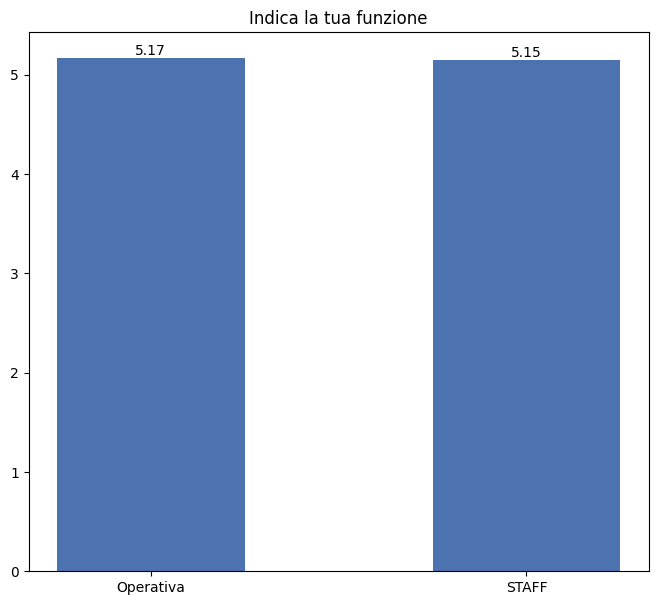

In [16]:
def get_stratified_means_full_benchmarks(data, subset_cols, stratifier_col):
    temp_df = data[subset_cols].apply(pd.to_numeric, errors='coerce').replace(0, np.nan)
    temp_df[stratifier_col] = data[stratifier_col]
    report_medie = temp_df.groupby(stratifier_col).mean().T
    return report_medie.round(2)

# Definisci le sezioni di colonne
sezioni = [(22, 25), (25, 28), (28, 31)]

# Definisci le stratificazioni
stratificazioni = {
    'Funzione': {
        'col': 'Response.12',
        'ticks': ['Operativa', 'STAFF'],
        'title': 'Indica la tua funzione'
    },
}

# Calcola tutti i report
risultati = {}
for nome, config in stratificazioni.items():
    reports = []
    for start, end in sezioni:
        report = get_stratified_means_full_benchmarks(
            data, 
            data.iloc[:, start:end].columns,
            config['col']
        )
        reports.append(report)
    risultati[nome] = pd.concat(reports)

# Crea il grafico
fig, ax = plt.subplots(figsize=(8, 7))
config = stratificazioni['Funzione']
ax.bar(config['ticks'], risultati['Funzione'].iloc[:, :2].mean(), width=0.5, color='#4c72b0')
ax.set_title(config['title'])
ax.bar_label(
    ax.containers[0], 
    labels=[f'{v.get_height():.2f}' for v in ax.containers[0]], 
    label_type='edge', 
    color='black', 
    fontsize=10
)
plt.show()

Proviamoce

Generazione di 8 set di grafici...

=== SET 1: Sezioni [(22, 25), (25, 28), (28, 31)] ===
Generando grafico stacked...


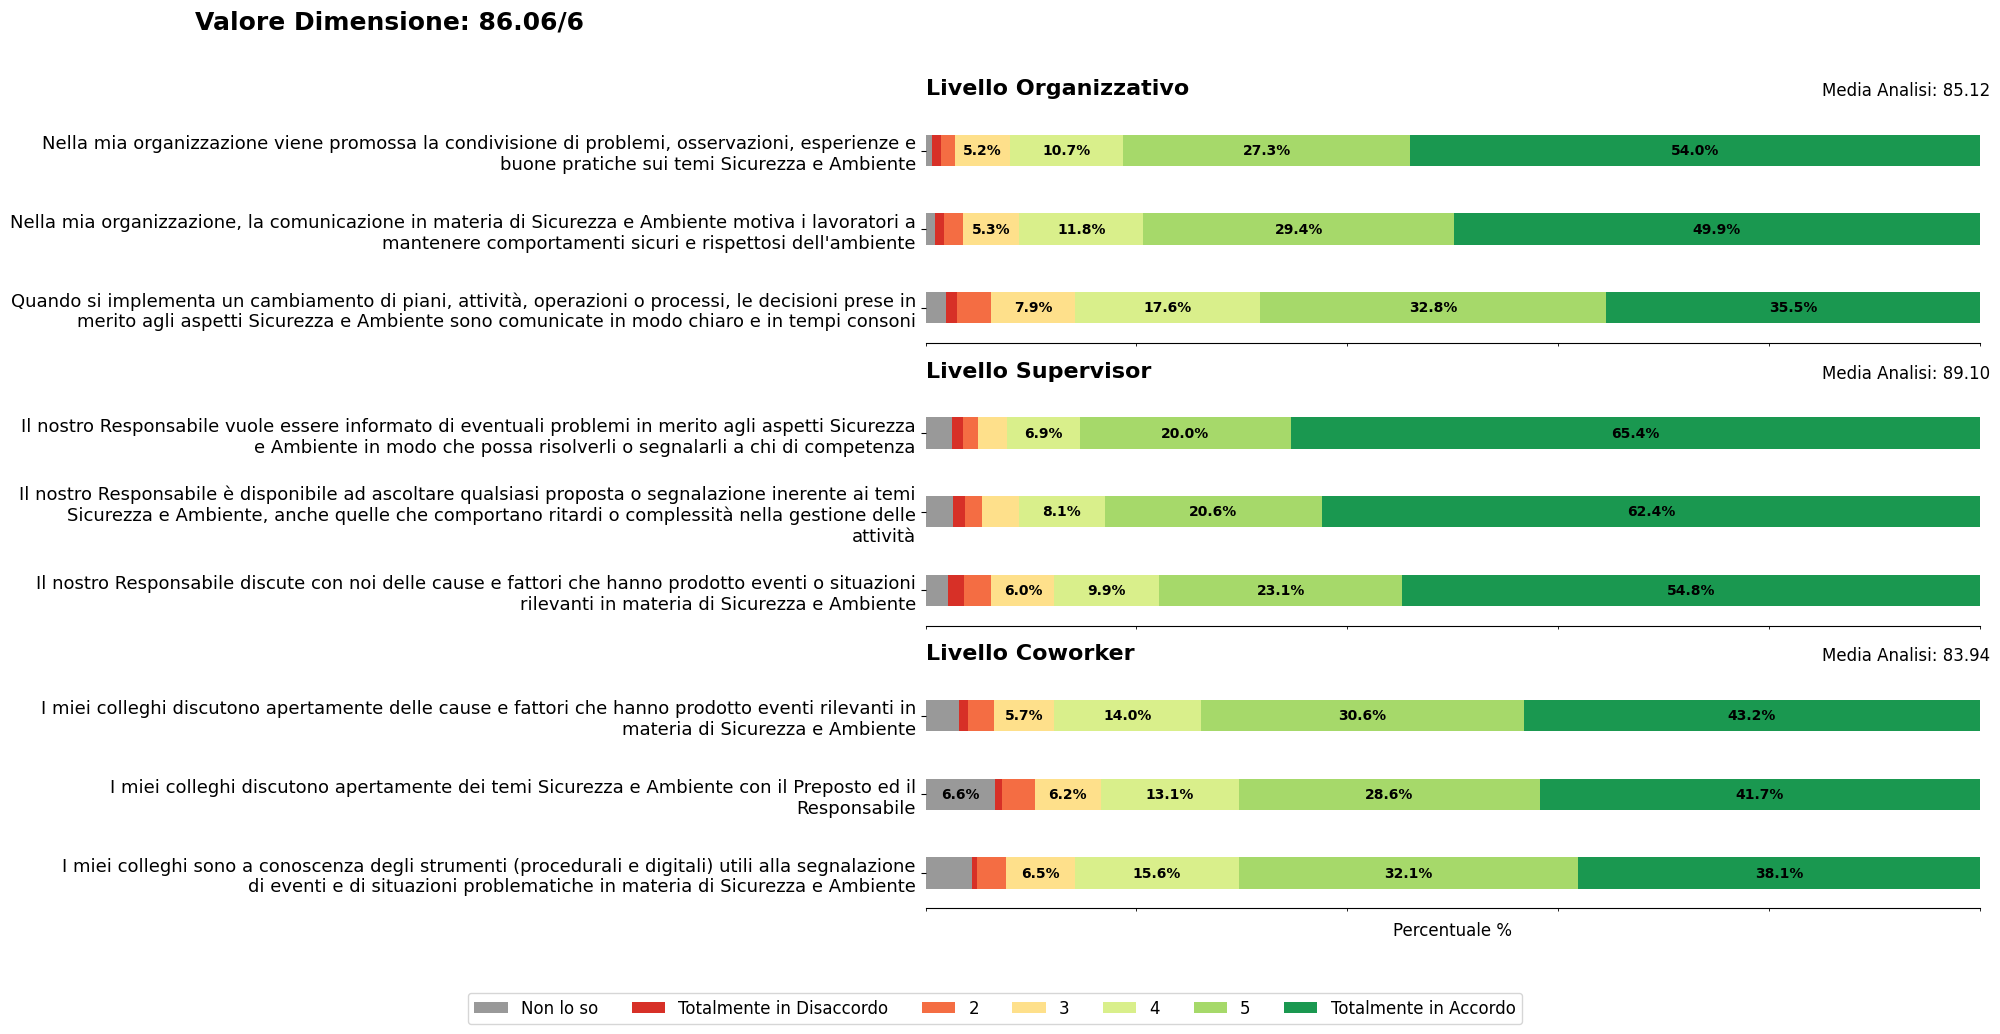

Generando grafici stratificati (età/anzianità)...


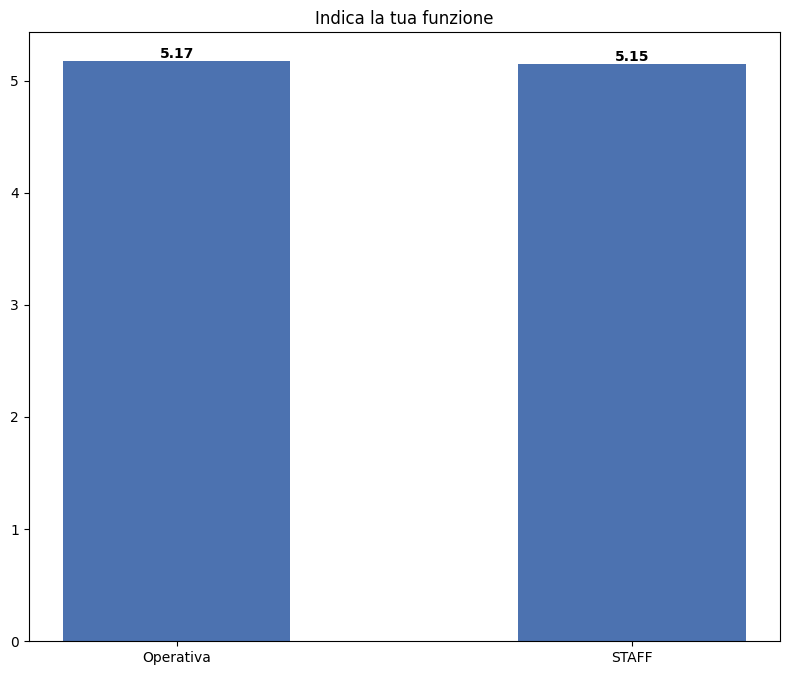

Set 1 completato!

=== SET 2: Sezioni [(31, 34), (34, 37), (37, 40)] ===
Generando grafico stacked...


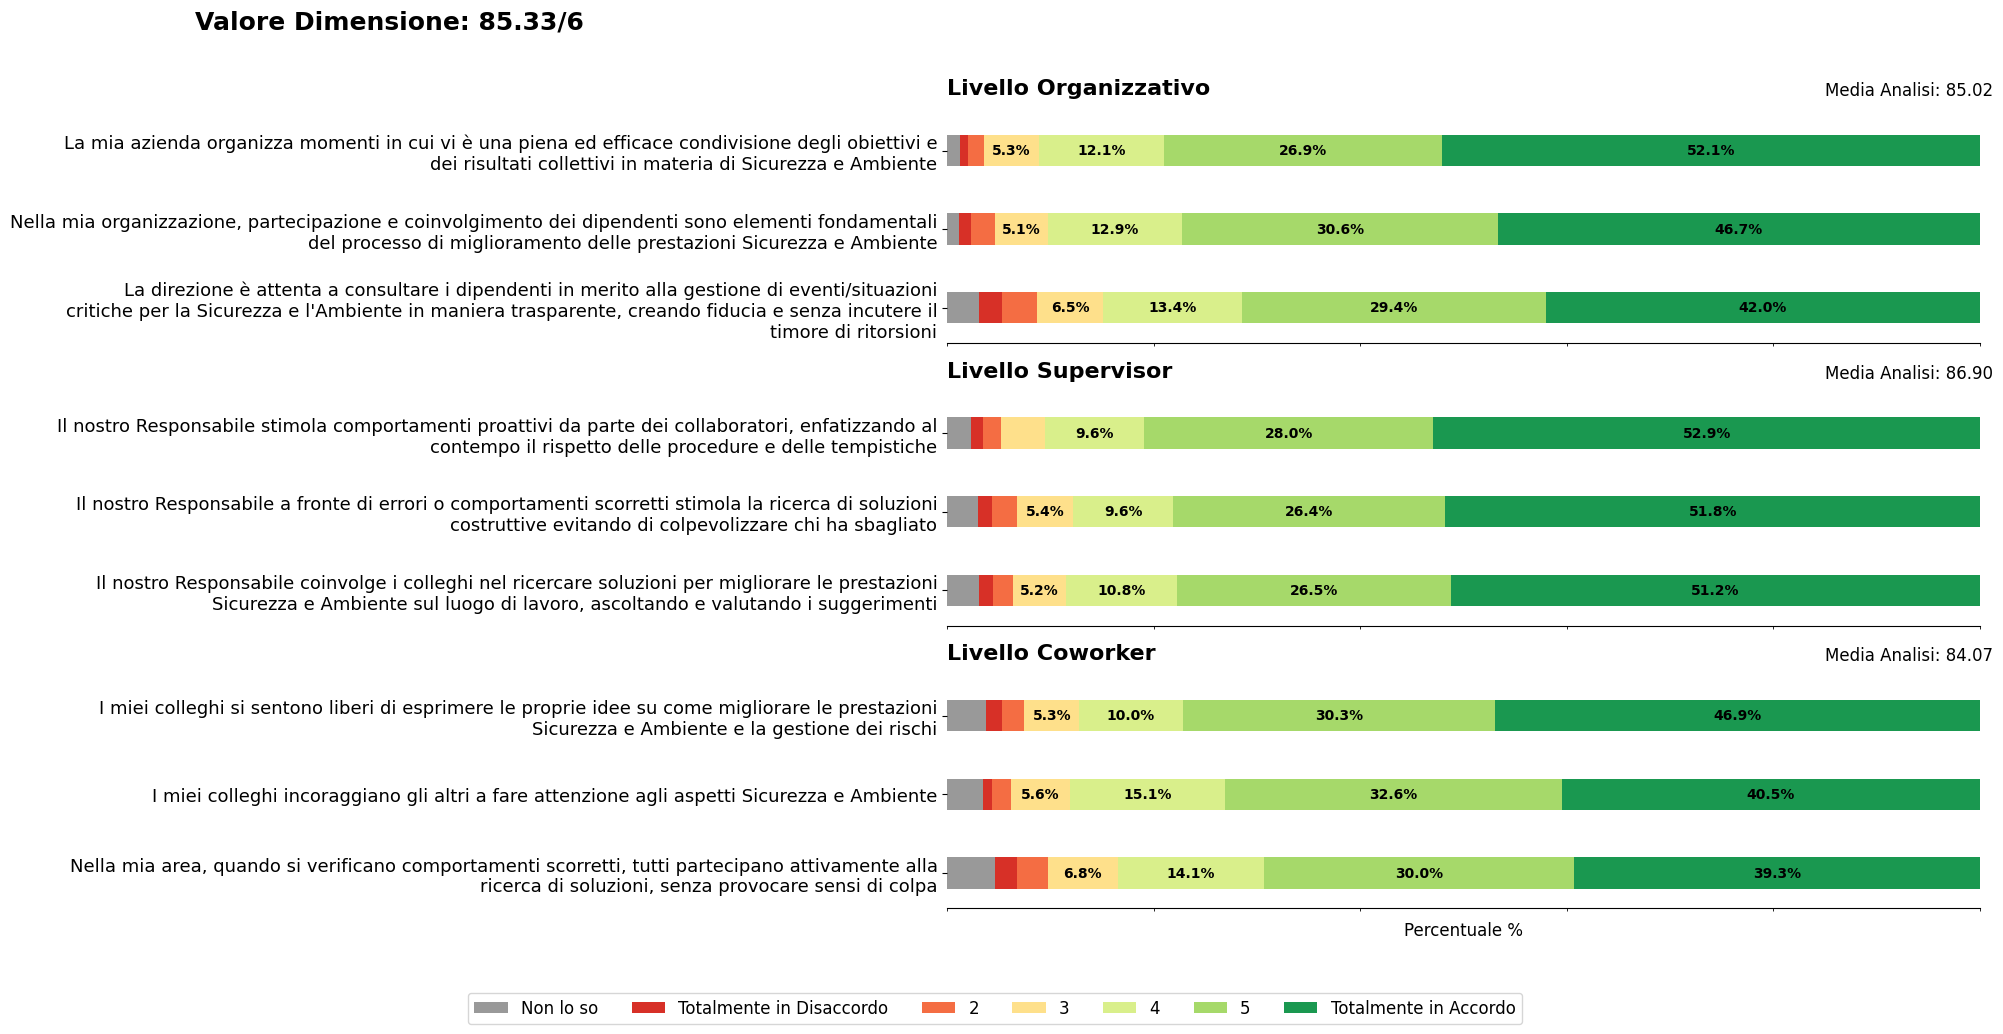

Generando grafici stratificati (età/anzianità)...


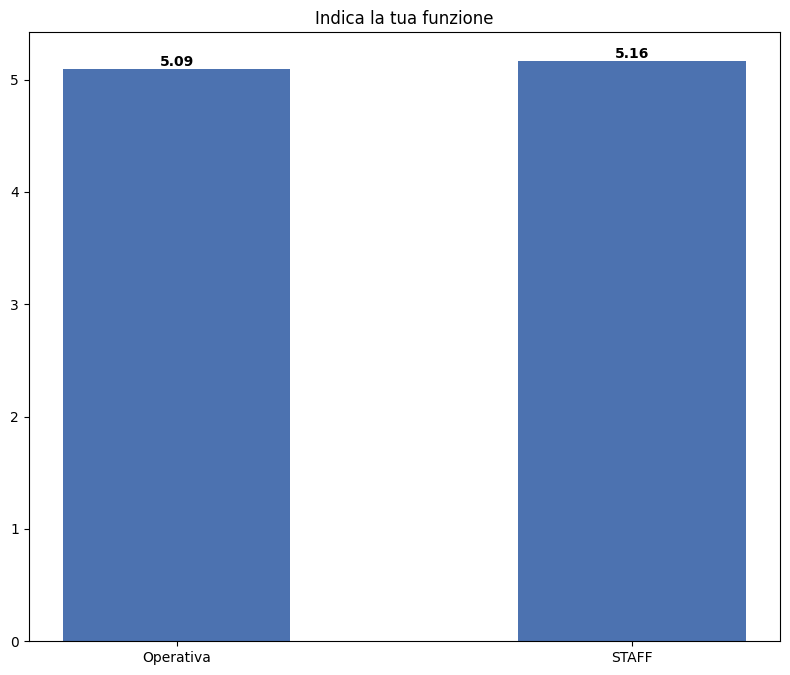

Set 2 completato!

=== SET 3: Sezioni [(41, 44), (44, 47), (47, 50)] ===
Generando grafico stacked...


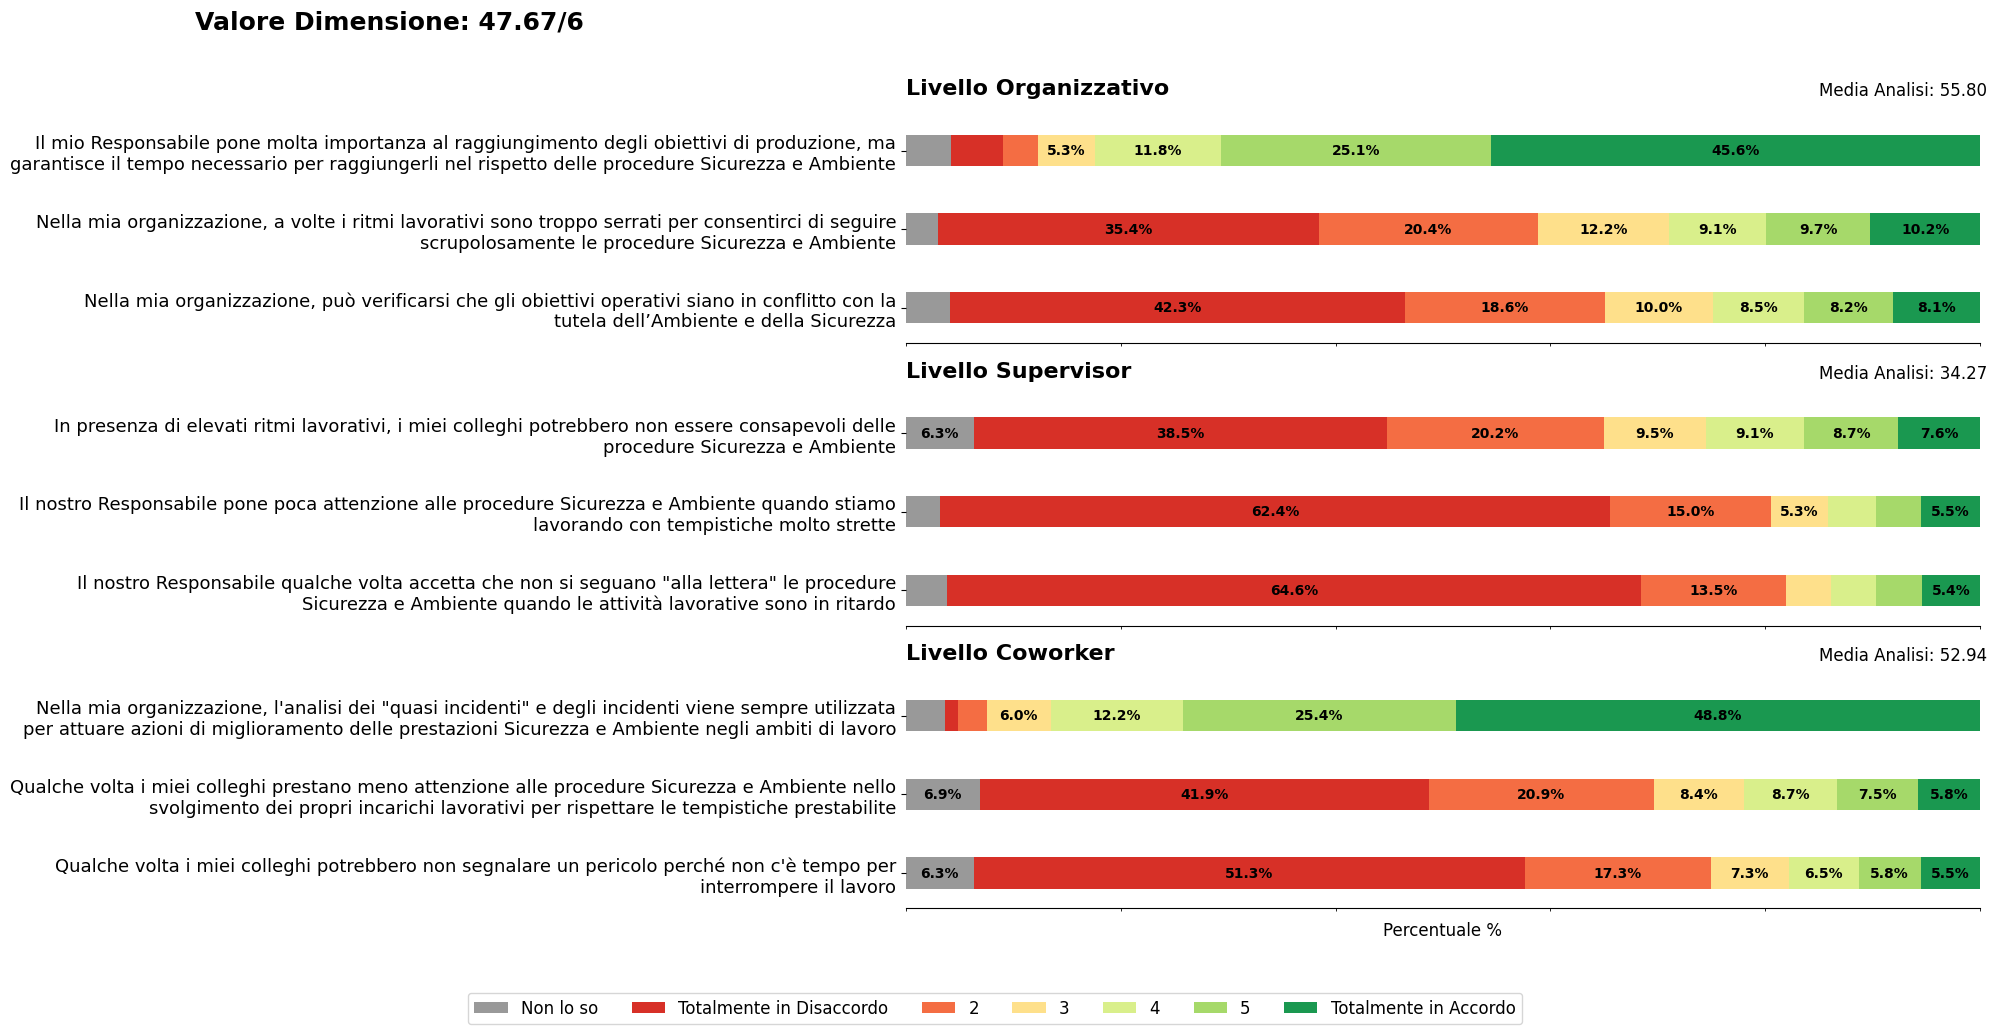

Generando grafici stratificati (età/anzianità)...


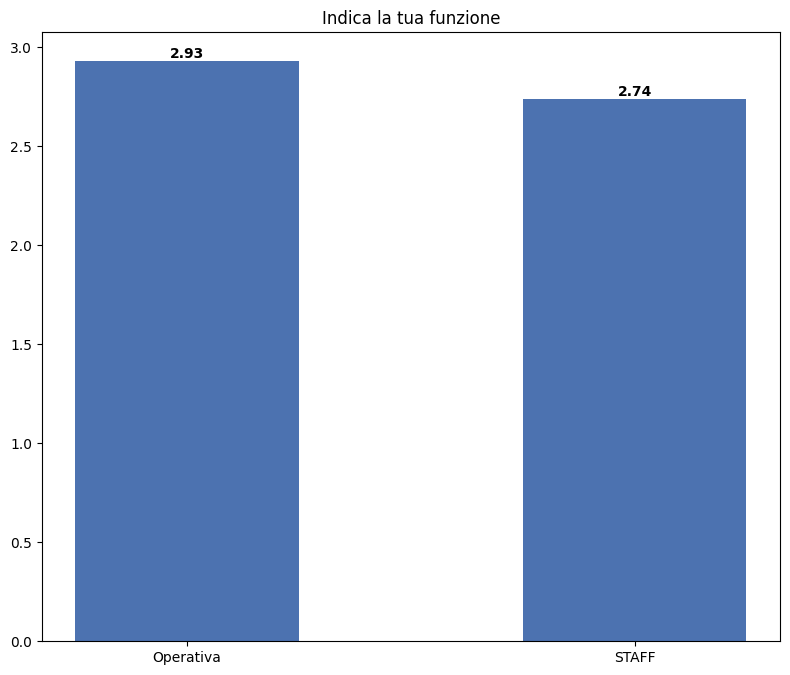

Set 3 completato!

=== SET 4: Sezioni [(50, 53), (53, 56), (56, 59)] ===
Generando grafico stacked...


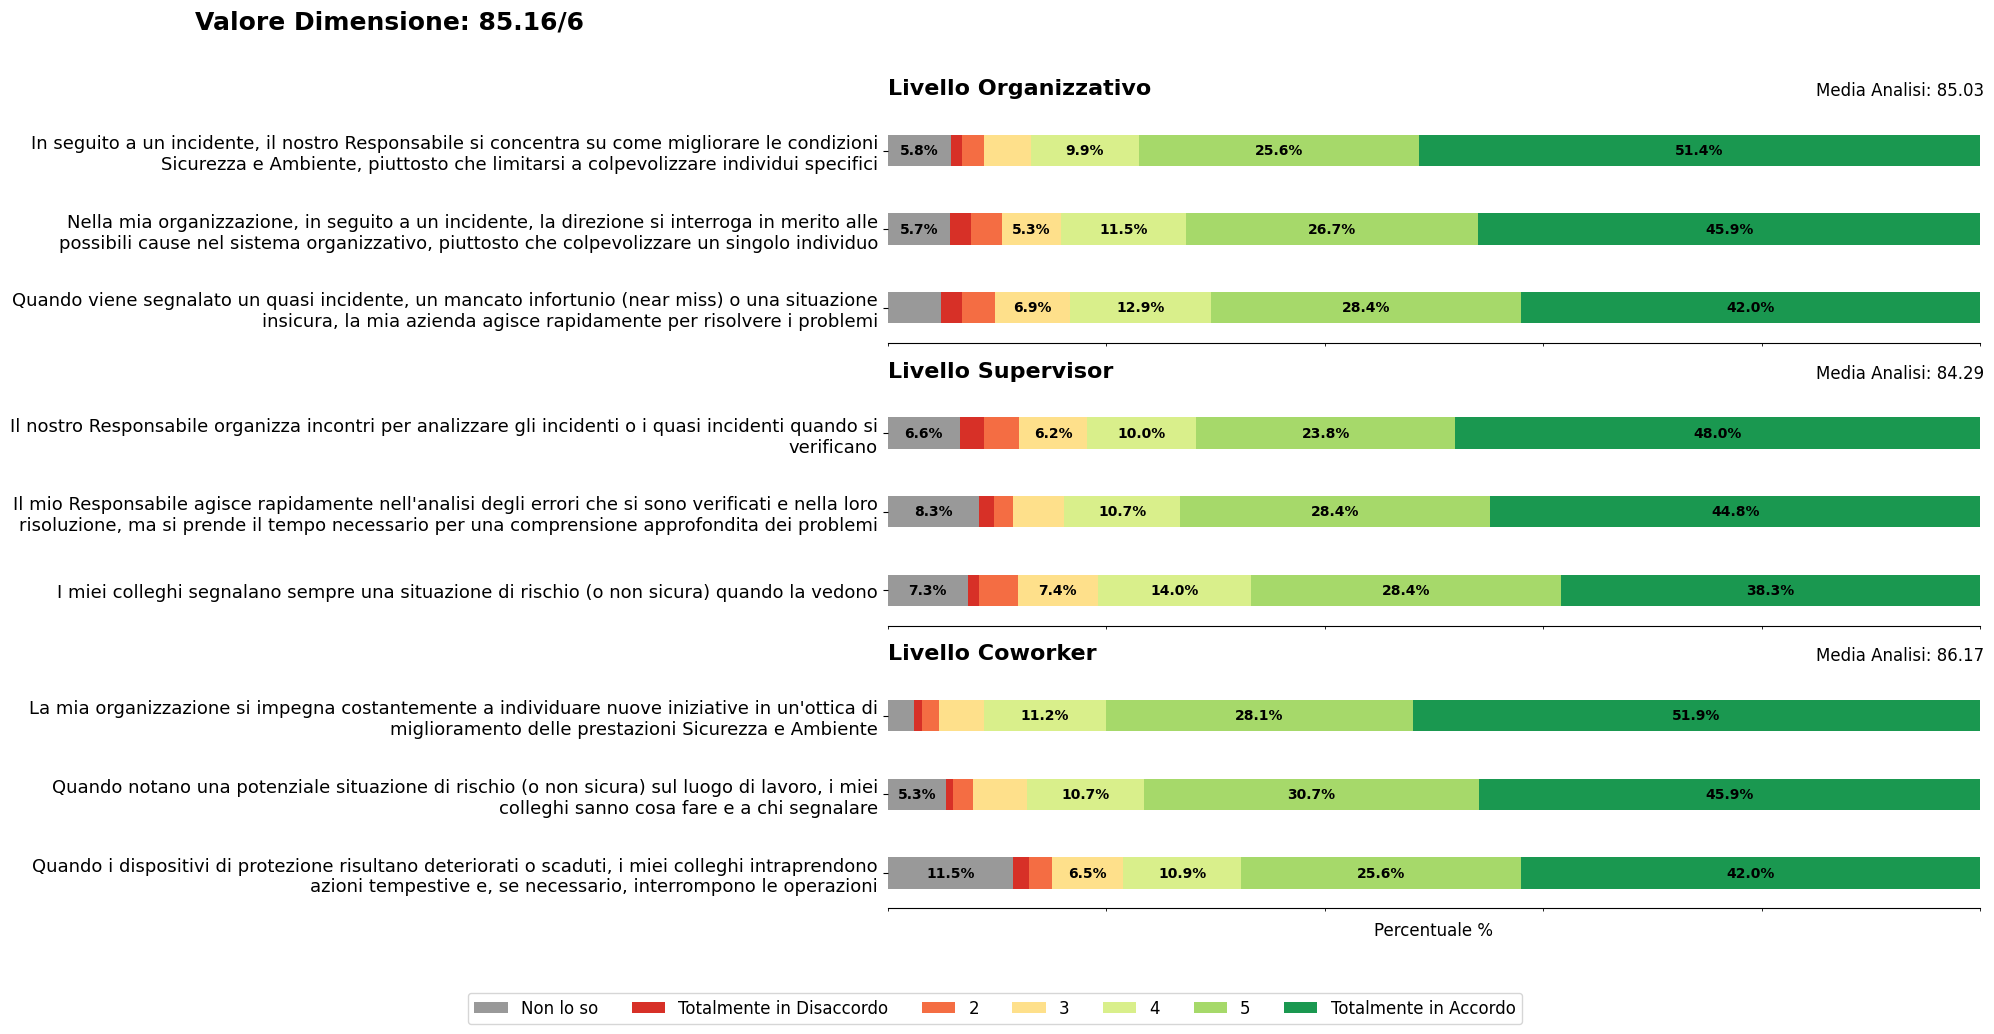

Generando grafici stratificati (età/anzianità)...


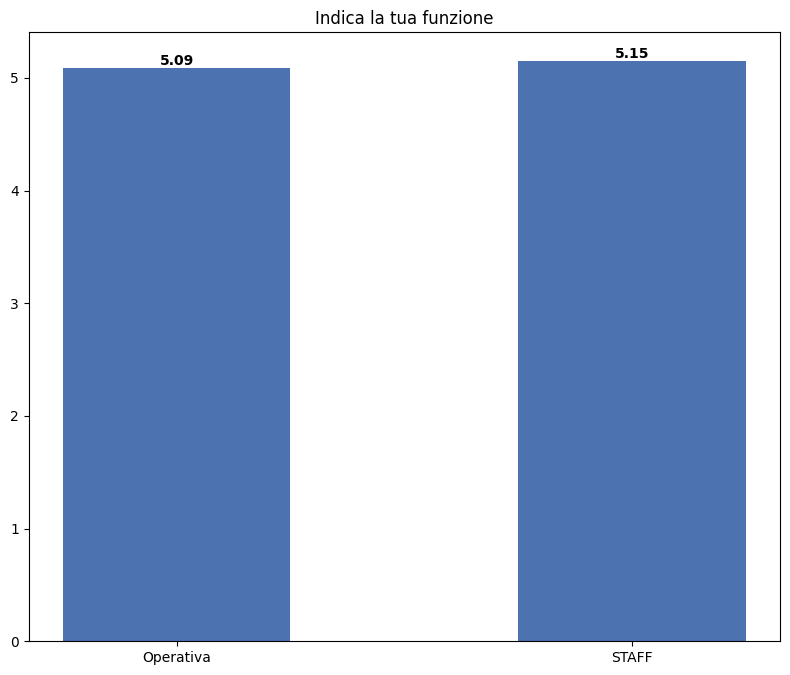

Set 4 completato!

=== SET 5: Sezioni [(59, 62), (62, 65), (65, 68)] ===
Generando grafico stacked...


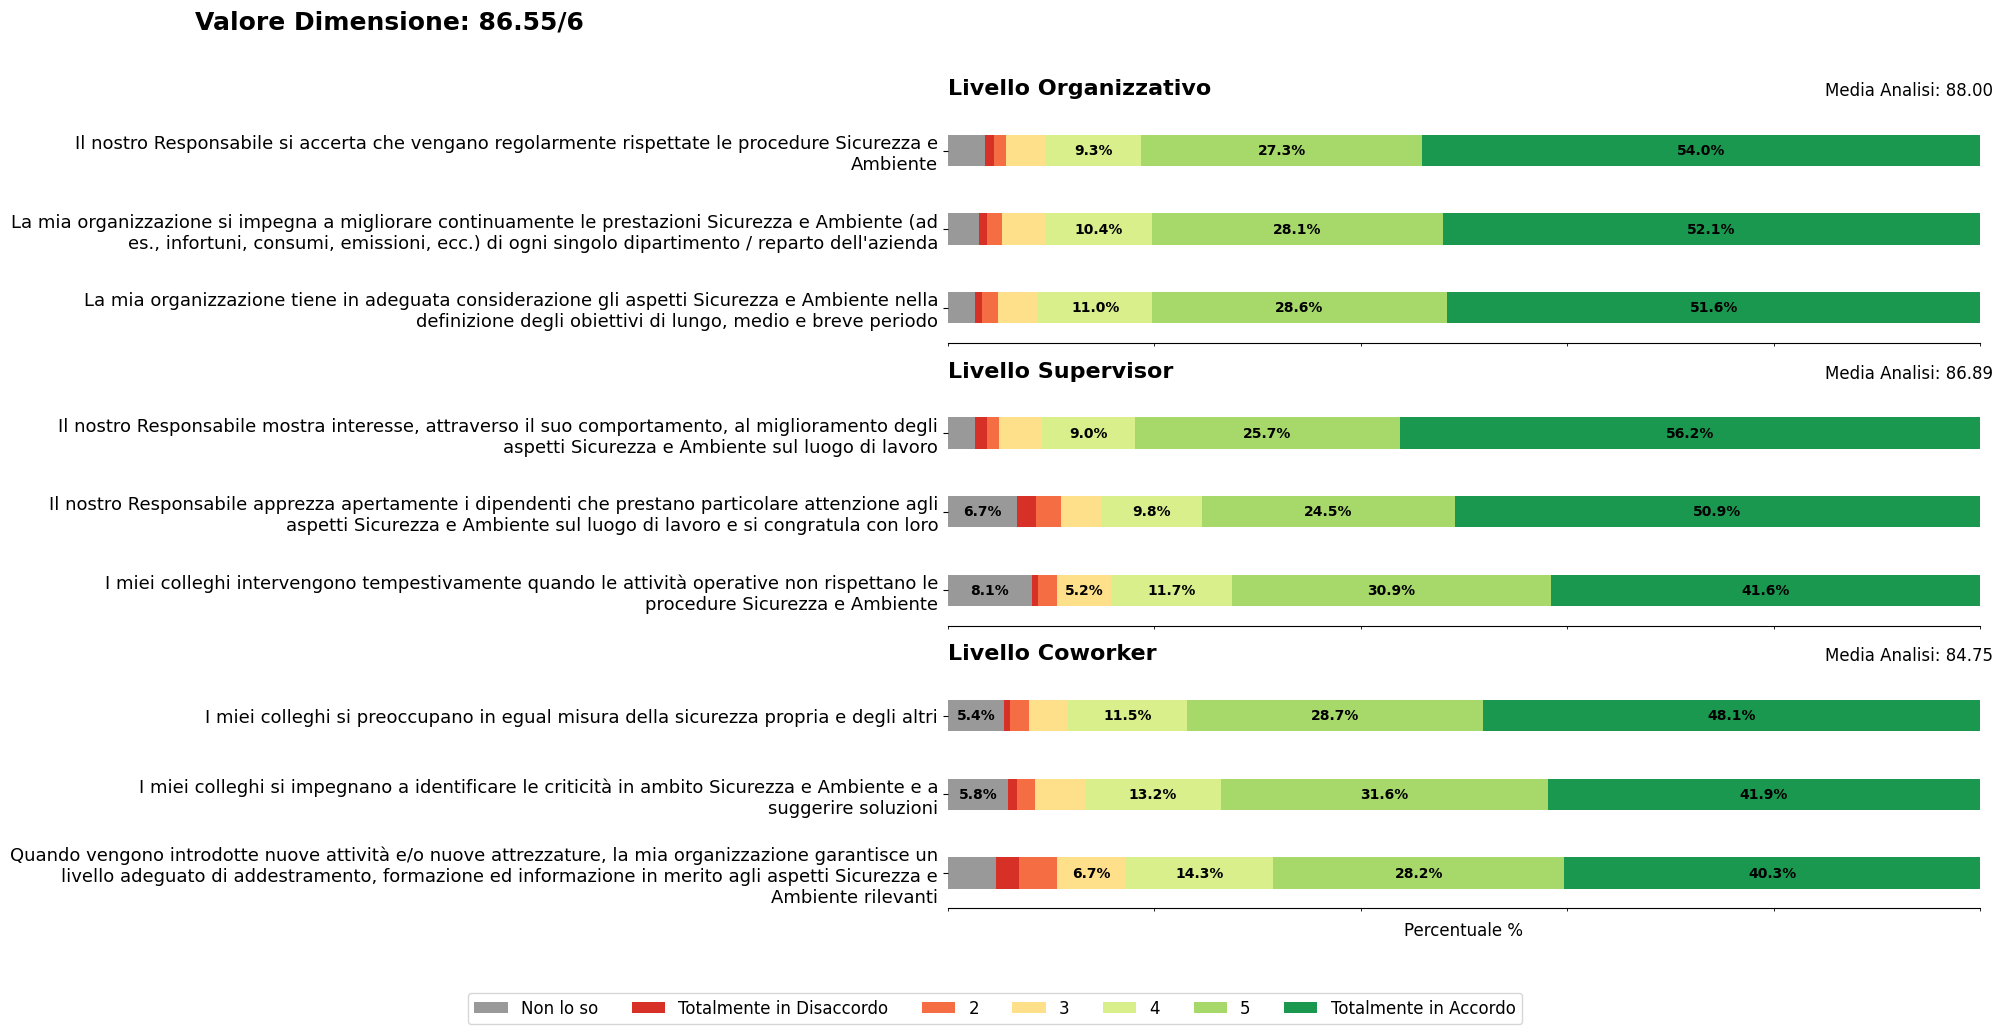

Generando grafici stratificati (età/anzianità)...


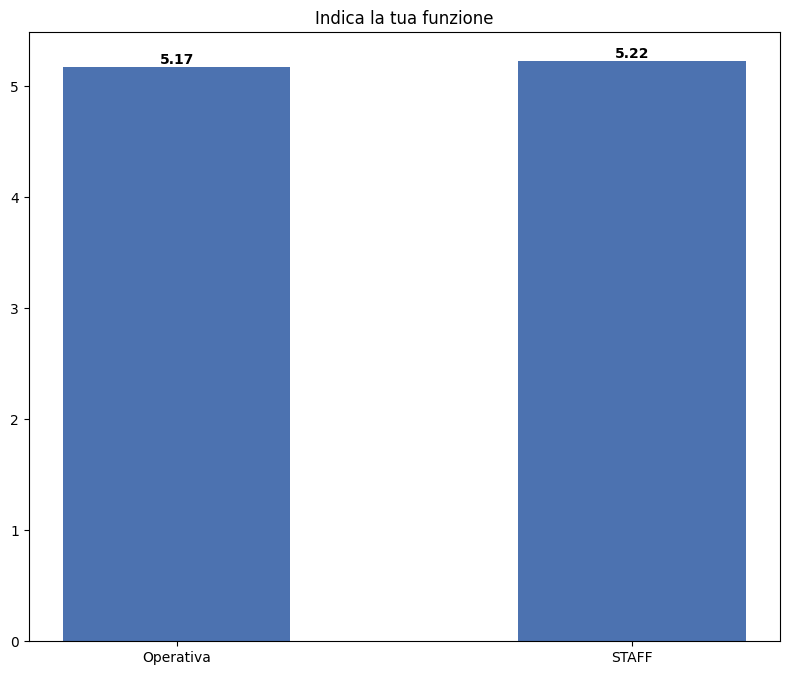

Set 5 completato!

=== SET 6: Sezioni [(68, 71), (71, 74), (74, 77)] ===
Generando grafico stacked...


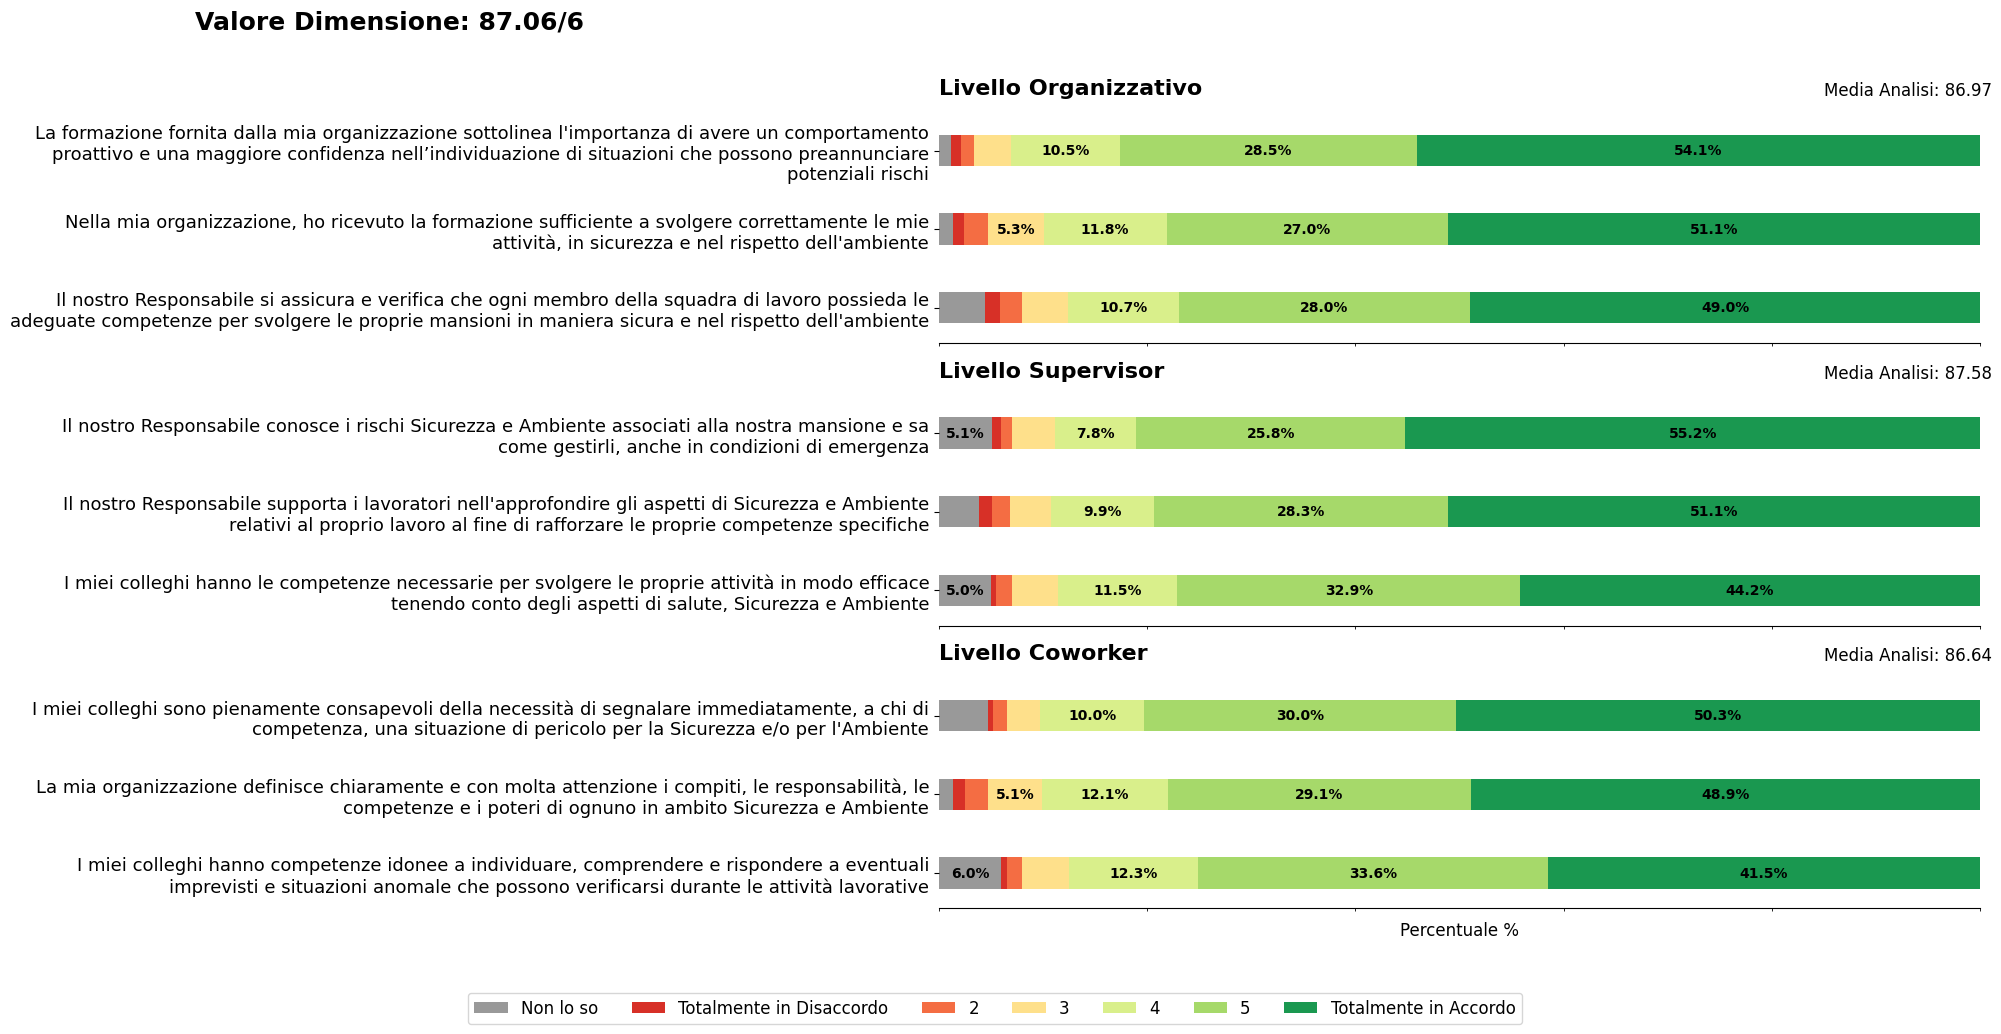

Generando grafici stratificati (età/anzianità)...


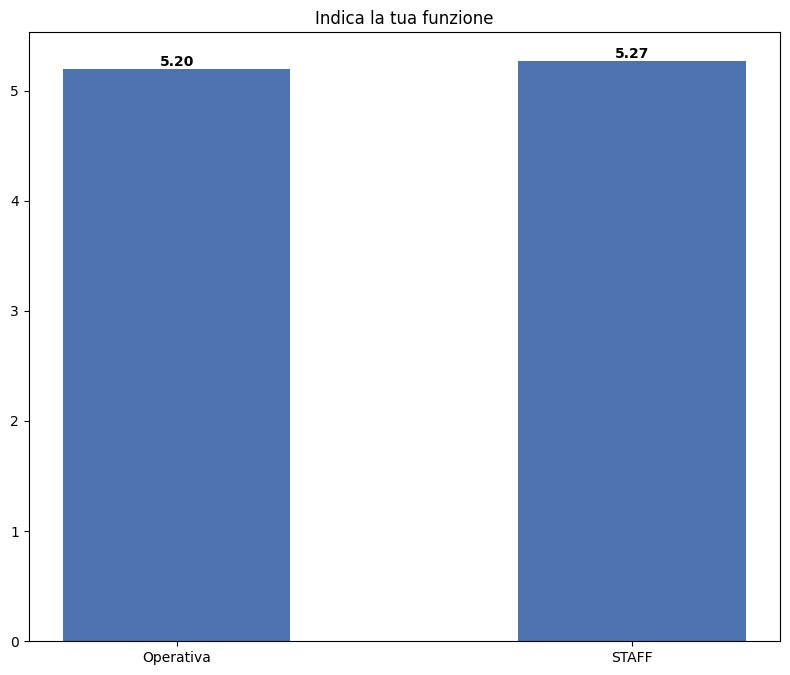

Set 6 completato!

=== SET 7: Sezioni [(77, 81)] ===
Generando grafico stacked...


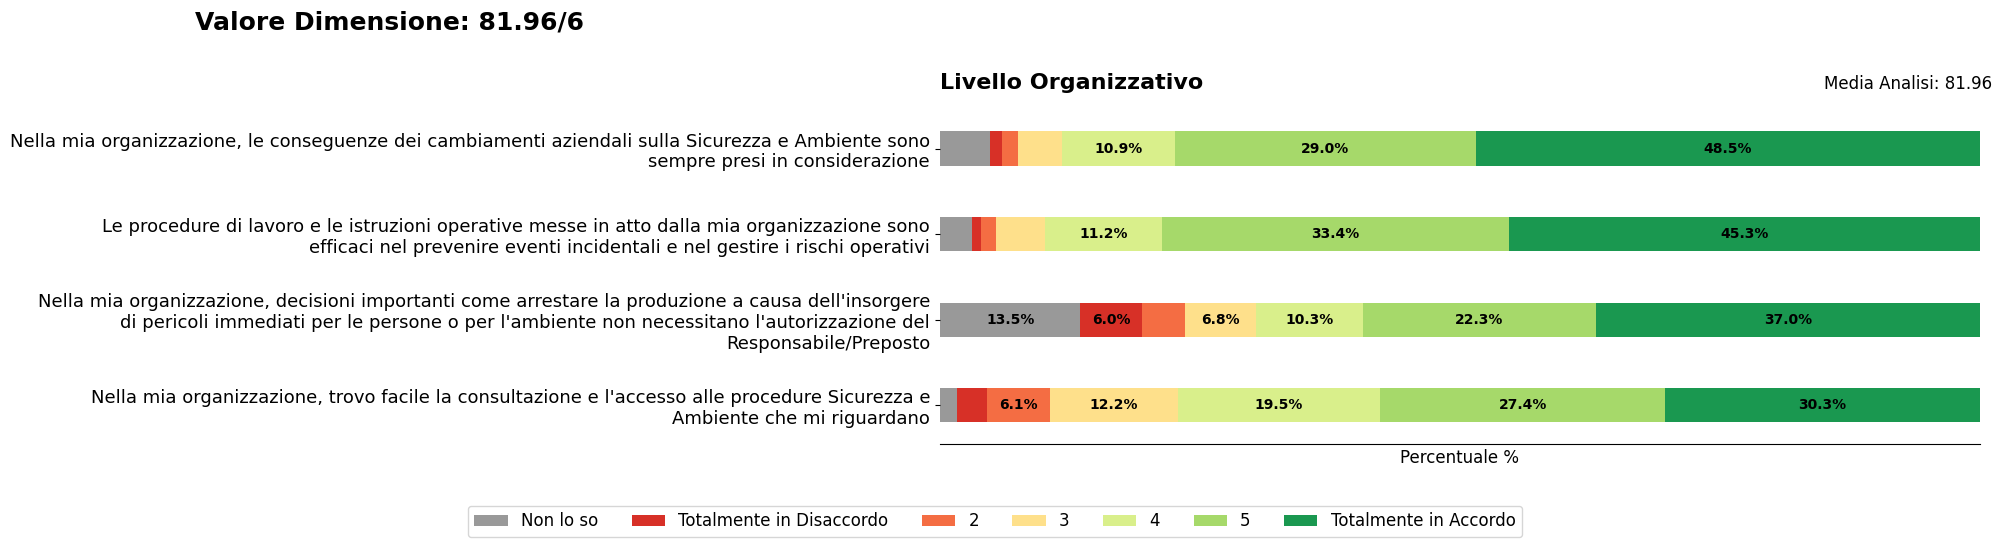

Generando grafici stratificati (età/anzianità)...


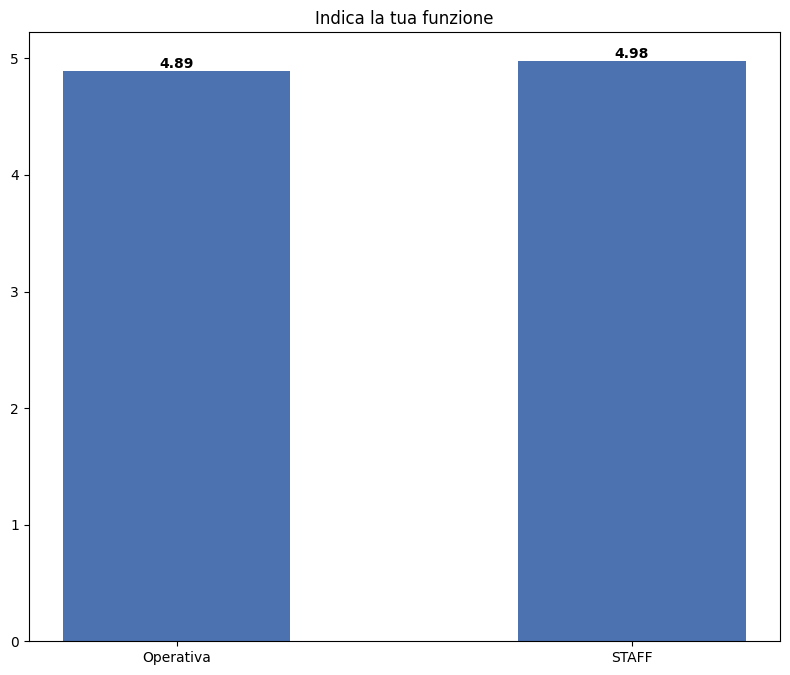

Set 7 completato!

=== SET 8: Sezioni [(81, 86)] ===
Generando grafico stacked...


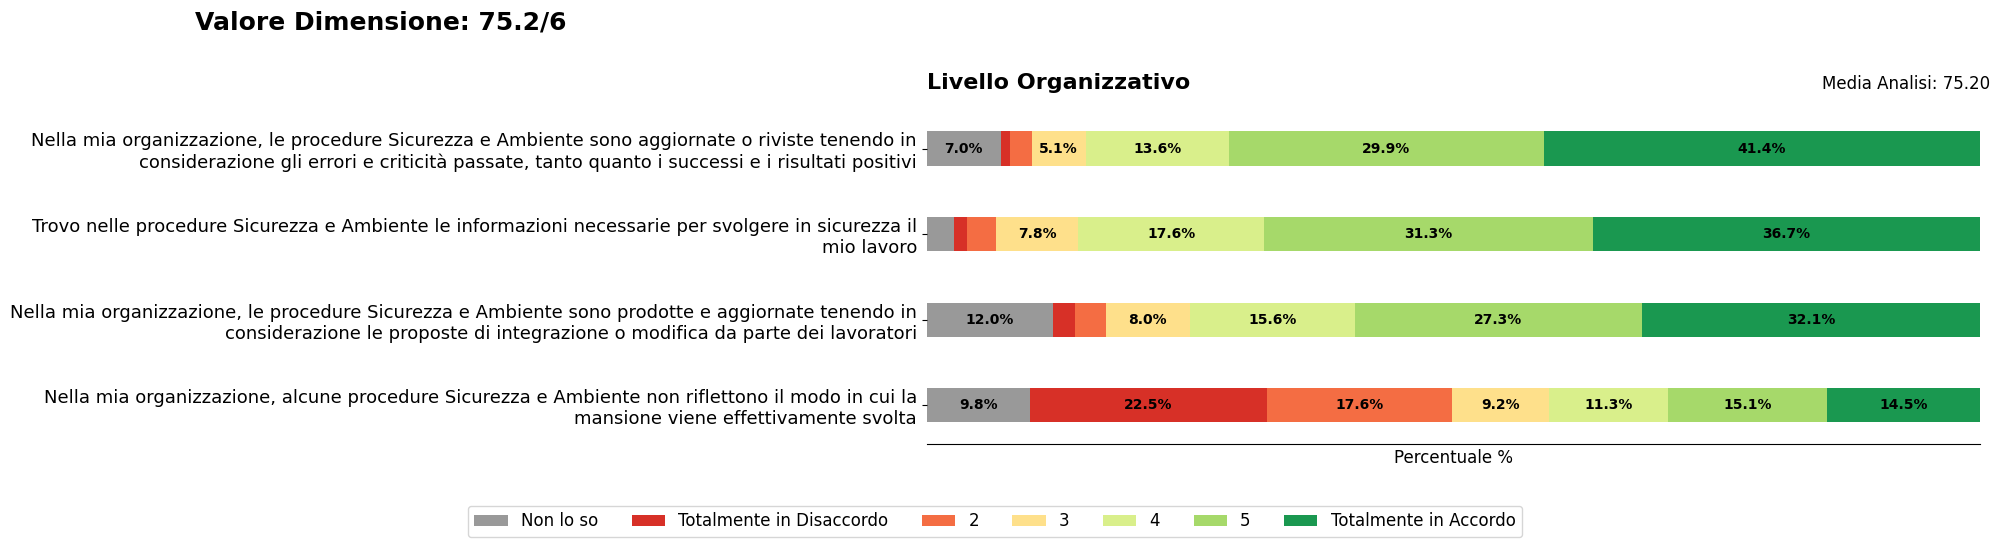

Generando grafici stratificati (età/anzianità)...


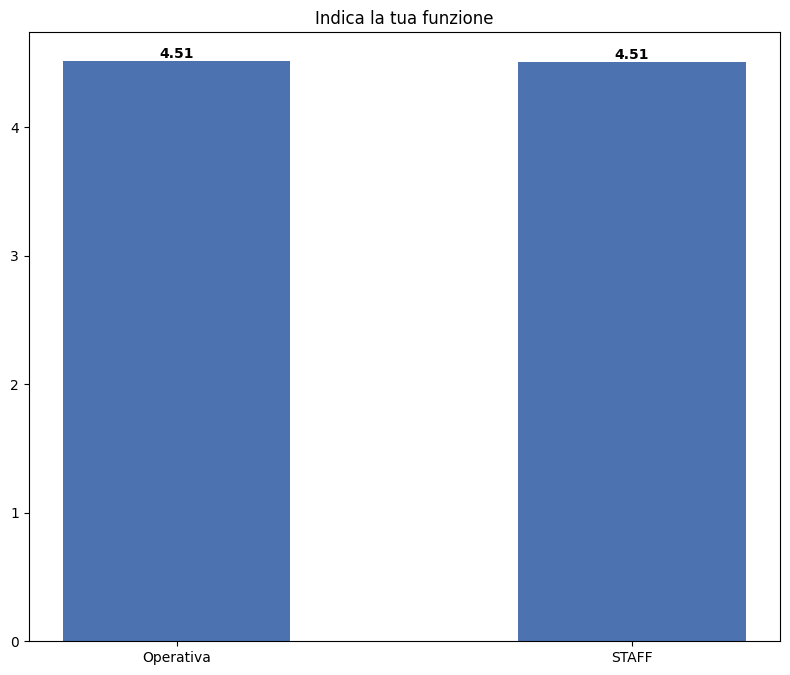

Set 8 completato!

Tutti i grafici sono stati generati!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# ===== CONFIGURAZIONE GENERALE =====
# Definisci tutte le tue triplette di sezioni
tutte_le_triplette = [
    [(22, 25), (25, 28), (28, 31)],   # Prima tripletta
    [(31, 34), (34, 37), (37, 40)],  # Seconda tripletta
    [(41, 44), (44, 47), (47, 50)],  # Terza tripletta (esempio)
    [(50, 53), (53, 56), (56, 59)],  # Quarta tripletta (esempio)
    [(59, 62), (62, 65), (65, 68)],
    [(68, 71), (71, 74), (74, 77)],
    [(77,81)],
    [(81,86)]
]


# Titoli per ogni tripletta (per il grafico stacked)
titoli_triplette = ["Livello Organizzativo", "Livello Supervisor", "Livello Coworker"]

# Stratificazioni (età e anzianità)
stratificazioni = {
    'Funzione': {
        'col': 'Response.12',
        'ticks': ['Operativa', 'STAFF'],
        'title': 'Indica la tua funzione'
    },
}


# Configurazione grafico stacked
mappa_nomi = {
    0: 'Non lo so', 
    1: 'Totalmente in Disaccordo', 
    2: '2', 
    3: '3', 
    4: '4', 
    5: '5', 
    6: 'Totalmente in Accordo'
}
colori = ['#999999', '#d73027', '#f46d43', '#fee08b', '#d9ef8b', '#a6d96a', '#1a9850']

# ===== FUNZIONI =====
def get_summary_dataset(subset):
    rows = []
    for col in subset.columns:
        perc = subset[col].value_counts(normalize=True) * 100
        df_row = pd.DataFrame(perc).T
        df_row.index = [col]
        rows.append(df_row)
    
    dataset = pd.concat(rows).fillna(0)
    dataset = dataset.sort_index(axis=1, ascending=True)
    
    medie = subset.apply(pd.to_numeric, errors='coerce').replace(0, np.nan).mean()
    dataset['Media'] = medie* (100/6)
    dataset['Media_analisi'] = dataset['Media'].mean()
    
    return dataset

def get_stratified_means_full_benchmarks(data, subset_cols, stratifier_col):
    temp_df = data[subset_cols].apply(pd.to_numeric, errors='coerce').replace(0, np.nan)
    temp_df[stratifier_col] = data[stratifier_col]
    report_medie = temp_df.groupby(stratifier_col).mean().T
    
    for gruppo in report_medie.columns:
        report_medie[f'Media_eta_{gruppo}'] = report_medie[gruppo].mean()
    
    return report_medie.round(2)

def crea_grafico_stacked(sezioni, titoli, data, titolo_figura="Analisi"):
    """Crea un grafico stacked per una tripletta di sezioni (o singola sezione)"""
    # Genera i dataframe
    dfs = []
    for start, end in sezioni:
        df = get_summary_dataset(data.iloc[:, start:end]).sort_values(by=6, ascending=False)
        dfs.append(df)
    
    # Calcola la media delle medie analisi
    media_complessiva = pd.concat([df['Media_analisi'] for df in dfs]).unique().mean()
    
    # Determina il numero di subplot in base al numero di sezioni
    num_sezioni = len(sezioni)
    
    # Crea il grafico
    if num_sezioni == 1:
        # Caso singola sezione: un solo grafico
        fig, ax = plt.subplots(figsize=(20, 5))
        axes = [ax]  # Metti in lista per uniformità nel codice
    else:
        # Caso tripletta: 3 subplot
        fig, axes = plt.subplots(nrows=num_sezioni, ncols=1, figsize=(20, 10), sharex=True)
        if num_sezioni == 1:
            axes = [axes]  # Converti in lista se è un solo asse
    
    fig.suptitle(f"{titolo_figura}: {media_complessiva.round(2)}/100", 
                 fontsize=18, fontweight='bold', y=0.995, x=0.1, ha='left')
    
    for i, (df, titolo) in enumerate(zip(dfs, titoli)):
        ax = axes[i]
        df_plot = df.iloc[:, :-2].copy()
        labels_wrapped = [textwrap.fill(label, width=100) for label in df_plot.index]
        df_plot.index = labels_wrapped
        
        plot = df_plot.plot(kind='barh', stacked=True, color=colori, ax=ax, legend=False, width=0.4)
        
        for container in ax.containers:
            labels = [f'{v.get_width():.1f}%' if v.get_width() > 5 else '' for v in container]
            ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, fontweight='bold')
        
        ax.set_title(titolo, fontsize=16, fontweight='bold', loc='left', pad=15)
        ax.text(85, -0.7, f'Media Analisi: {df["Media"].mean():.2f}', fontsize=12)
        ax.tick_params(axis='y', labelsize=13) 
        ax.tick_params(axis='x', labelsize=11)
        ax.invert_yaxis() 
        ax.set_xlim(0, 100)
        ax.set_xlabel("Percentuale %", fontsize=12)
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.set_xticks([])
    
    # Legenda
    etichette_legenda = [mappa_nomi[int(c)] for c in dfs[0].columns[:-2]]
    fig.legend(
        labels=etichette_legenda,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.02),
        ncol=7,
        frameon=True,
        fontsize=12
    )
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.98]) 
    plt.show()
    
    return pd.concat(dfs)


def crea_grafico_stratificato(sezioni, stratificazioni, data, titolo_figura=""):
    risultati = {}
    
    for nome, config in stratificazioni.items():
        reports = []
        for start, end in sezioni:
            report = get_stratified_means_full_benchmarks(
                data, 
                data.iloc[:, start:end].columns,
                config['col']
            )
            reports.append(report)
        risultati[nome] = pd.concat(reports)
    
    if not any(len(risultati[nome]) > 0 for nome in risultati):
        print(f"Avviso: Nessun dato disponibile per {titolo_figura}")
        return risultati
    
    # Un solo asse perché c'è una sola stratificazione
    fig, ax = plt.subplots(figsize=(8, 7))
    fig.suptitle(titolo_figura, fontsize=16, fontweight='bold')
    
    for nome, config in stratificazioni.items():
        # 2 gruppi invece di 3
        if risultati[nome].shape[1] >= 2:
            medie = risultati[nome].iloc[:, :2].mean()
        else:
            medie = risultati[nome].mean()
        
        ax.bar(config['ticks'][:len(medie)], medie, width=0.5, color='#4c72b0')
        ax.set_title(config['title'])
        ax.bar_label(
            ax.containers[0], 
            labels=[f'{v.get_height():.2f}' for v in ax.containers[0]], 
            label_type='edge', 
            color='black', 
            fontsize=10,
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()
    
    return risultati

# ===== ESECUZIONE CICLO PRINCIPALE =====
print(f"Generazione di {len(tutte_le_triplette)} set di grafici...\n")


for idx, sezioni in enumerate(tutte_le_triplette, 1):
    print(f"=== SET {idx}: Sezioni {sezioni} ===")
    
    # 1. Grafico stacked
    print(f"Generando grafico stacked...")
    df_completo = crea_grafico_stacked(
        sezioni, 
        ["Livello Organizzativo", "Livello Supervisor", "Livello Coworker"], 
        data,
        titolo_figura= 'Valore Dimensione'
    )
    
    # 2. Grafici stratificati
    print(f"Generando grafici stratificati (età/anzianità)...")
    risultati_strat = crea_grafico_stratificato(
        sezioni, 
        stratificazioni, 
        data
    )
    
    print(f"Set {idx} completato!\n")

print("Tutti i grafici sono stati generati!")

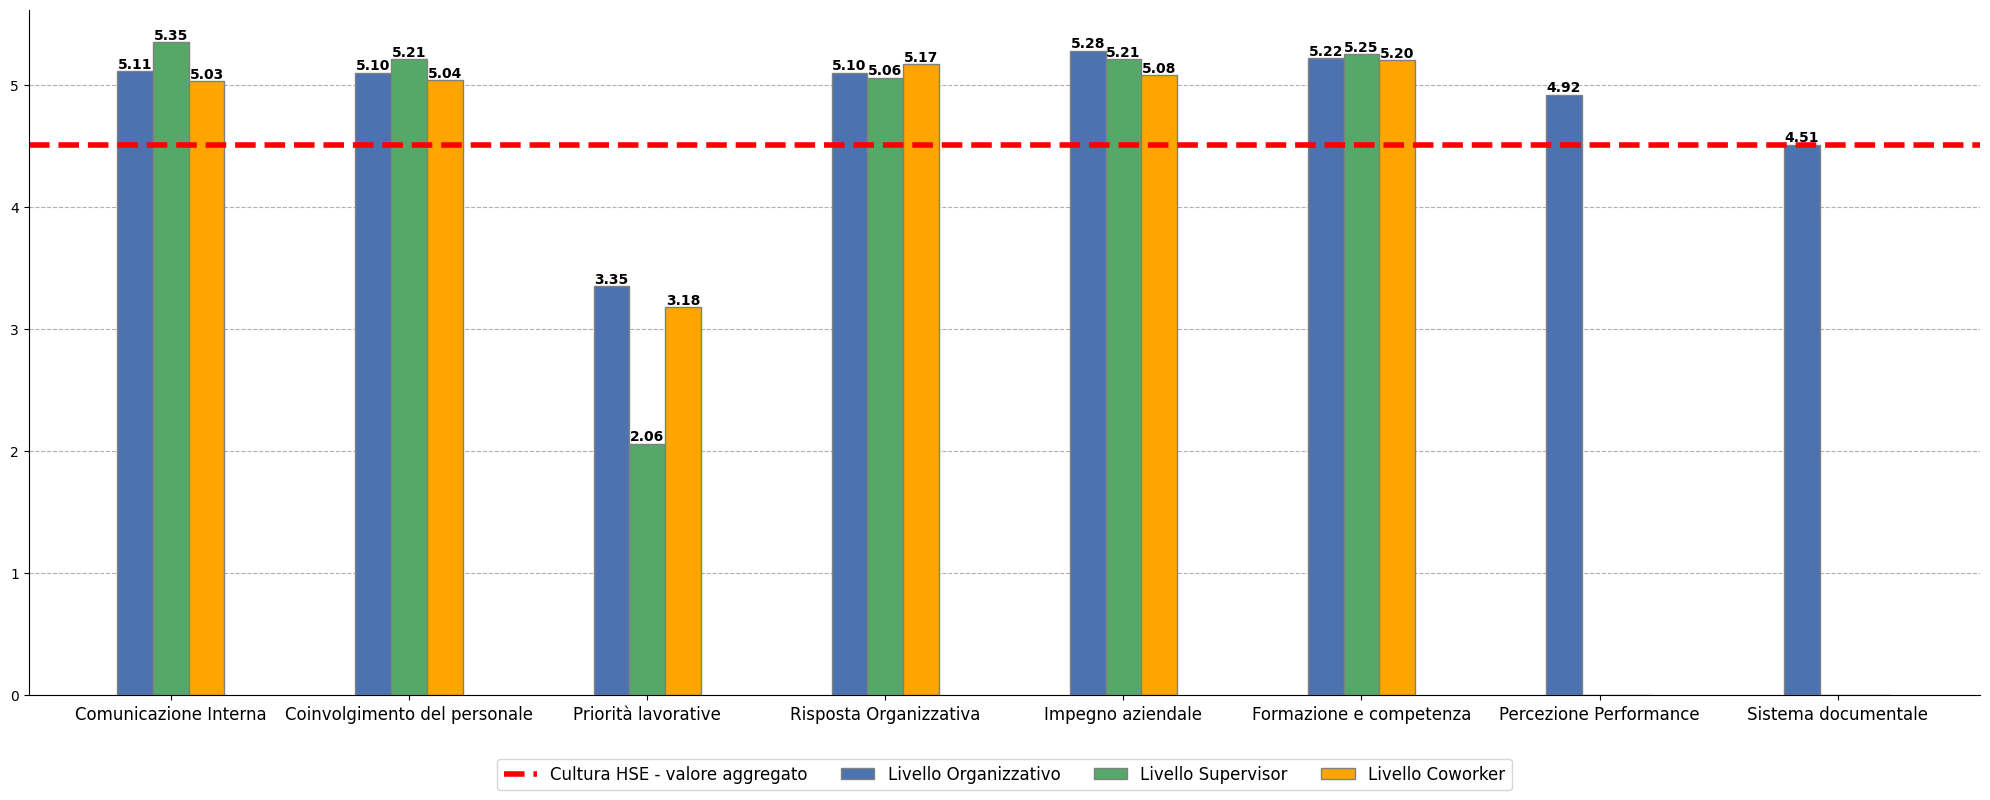

,Livello Organizzativo,Livello Supervisor,Livello Coworker
Comunicazione Interna,5.11,5.35,5.03
Coinvolgimento del personale,5.10,5.21,5.04
Priorità lavorative,3.35,2.06,3.18
Risposta Organizzativa,5.10,5.06,5.17
Impegno aziendale,5.28,5.21,5.08
Formazione e competenza,5.22,5.25,5.20
Percezione Performance,4.92,NaN,NaN
Sistema documentale,4.51,NaN,NaN


In [19]:
tutte_le_triplette = [
    [(22, 25), (25, 28), (28, 31)],   # Prima tripletta
    [(31, 34), (34, 37), (37, 40)],  # Seconda tripletta
    [(41, 44), (44, 47), (47, 50)],  # Terza tripletta (esempio)
    [(50, 53), (53, 56), (56, 59)],  # Quarta tripletta (esempio)
    [(59, 62), (62, 65), (65, 68)],
    [(68, 71), (71, 74), (74, 77)],
    [(77,81)],
    [(81,86)]
]
def crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data):
    medie_per_tripletta = []
    
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df = get_summary_dataset(data.iloc[:, start:end])
            media = df['Media_analisi'].unique()[0]  
            media_totale = media.mean()
            medie_sezione.append(media)
        
        # Completa con NaN se la tripletta ha meno di 3 valori
        while len(medie_sezione) < 3:
            medie_sezione.append(np.nan)
        
        medie_per_tripletta.append(medie_sezione)
    
    # Trasforma in array per facilità di manipolazione
    medie_array = np.array(medie_per_tripletta).T  # Trasponi per avere [sezione1, sezione2, sezione3]
    
    # Configurazione grafico
    barWidth = 0.15
    fig, ax = plt.subplots(figsize=(20, 8))
    
    # Posizioni delle barre
    n_triplette = len(tutte_le_triplette)
    br1 = np.arange(n_triplette)
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    
    # Colori per le tre sezioni
    colori_sezioni = ['#4c72b0', '#55a868', 'orange']  # Blu, Verde, Rosso
    
    # Etichette per le sezioni (usa i titoli della prima tripletta come riferimento)
    labels_sezioni = titoli_triplette if titoli_triplette else ['Sezione 1', 'Sezione 2', 'Sezione 3']
    
    # Crea le barre (sostituendo NaN con 0 per il plot, ma non mostrando la barra)
    bars1 = ax.bar(br1, np.nan_to_num(medie_array[0], nan=0), color=colori_sezioni[0], width=barWidth, 
                   edgecolor='grey', label=labels_sezioni[0])
    bars2 = ax.bar(br2, np.nan_to_num(medie_array[1], nan=0), color=colori_sezioni[1], width=barWidth, 
                   edgecolor='grey', label=labels_sezioni[1])
    bars3 = ax.bar(br3, np.nan_to_num(medie_array[2], nan=0), color=colori_sezioni[2], width=barWidth, 
                   edgecolor='grey', label=labels_sezioni[2])
    
    # Aggiungi i valori sopra le barre (solo se non sono NaN)
    for i, bars in enumerate([bars1, bars2, bars3]):
        labels = []
        for j, v in enumerate(bars):
            if not np.isnan(medie_array[i][j]):
                labels.append(f'{v.get_height():.2f}')
            else:
                labels.append('')
        ax.bar_label(bars, labels=labels, label_type='edge', color='black', fontsize=10, fontweight='bold')
    
    # Etichette sull'asse x
    ax.set_xticks([r + barWidth for r in range(n_triplette)])
    ax.set_xticklabels(['Comunicazione Interna', 'Coinvolgimento del personale', 
                        'Priorità lavorative', 'Risposta Organizzativa', 
                        'Impegno aziendale', 'Formazione e competenza', 
                        'Percezione Performance', 'Sistema documentale'], fontsize=12)  # Aggiungi "Leadership" per la settima
    ax.axhline(y= media_totale, color='red', linestyle='--', alpha=1, linewidth=4, label = 'Cultura HSE - valore aggregato') 
    # Legenda
    ax.legend(fontsize=12, loc='lower center',
              bbox_to_anchor=(0.5, -0.15),
              ncol=4,
              frameon=True)
    
    # Griglia
    ax.grid(axis='y', linestyle='--')
    ax.set_axisbelow(True)
    
    # Rimuovi bordi superiore e destro
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Restituisci le medie per riferimento
    return pd.DataFrame(
        medie_array.T, 
        columns=labels_sezioni,
        index=['Comunicazione Interna', 'Coinvolgimento del personale', 
               'Priorità lavorative', 'Risposta Organizzativa', 
               'Impegno aziendale', 'Formazione e competenza', 'Percezione Performance', 'Sistema documentale']
    )
crea_grafico_barre_raggruppate(tutte_le_triplette, titoli_triplette, data)

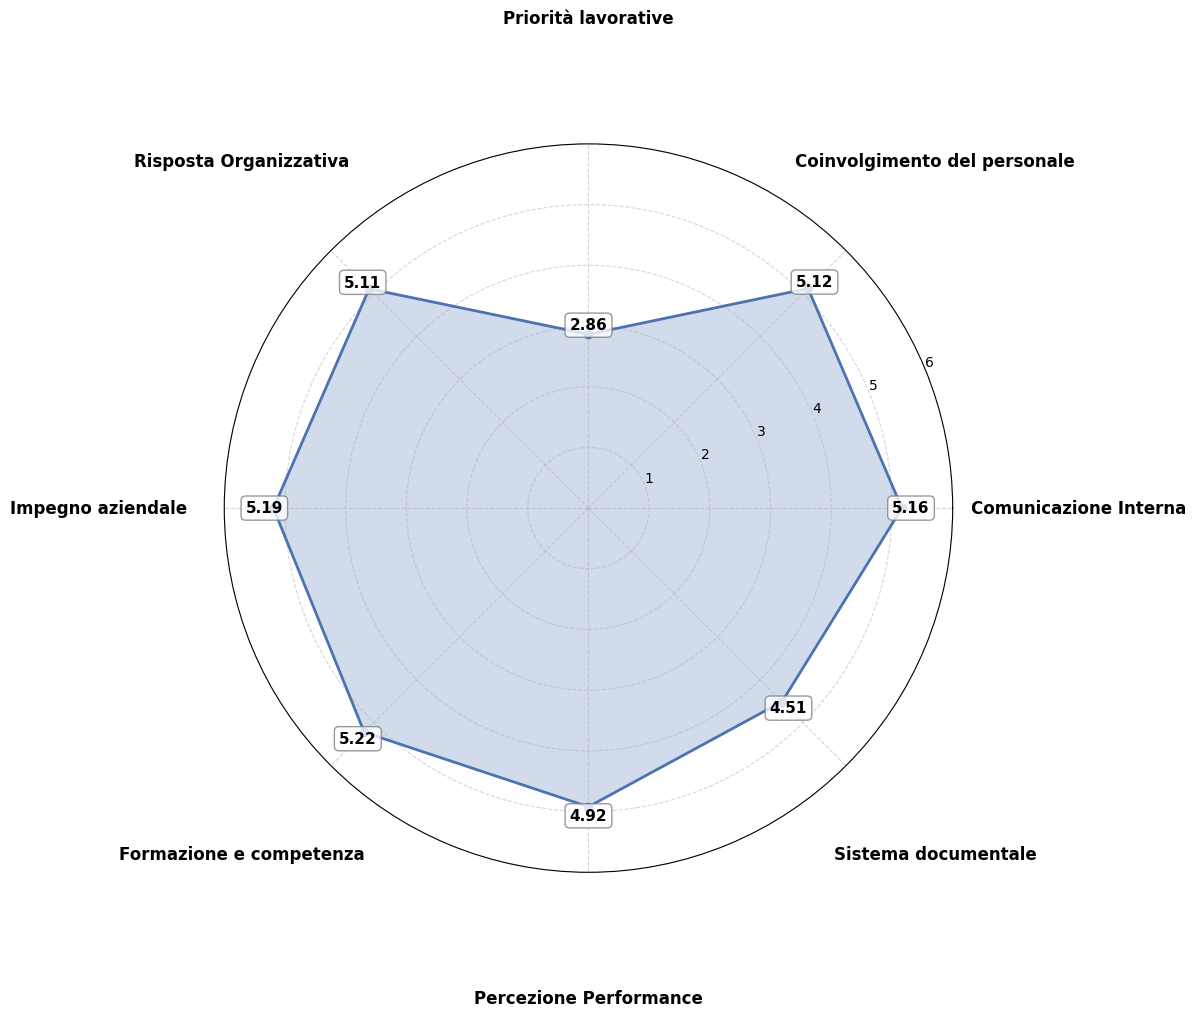


Valori del diagramma di Kiviat:
                      Categoria     Media
0         Comunicazione Interna  5.163333
1  Coinvolgimento del personale  5.116667
2           Priorità lavorative  2.863333
3        Risposta Organizzativa  5.110000
4             Impegno aziendale  5.190000
5       Formazione e competenza  5.223333
6        Percezione Performance  4.920000
7           Sistema documentale  4.510000


In [20]:
def crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data):
    """
    Crea un diagramma di Kiviat (radar chart) con le medie delle triplette
    """
    # Calcola le medie per ogni tripletta
    medie_categorie = []
    
    for sezioni in tutte_le_triplette:
        medie_sezione = []
        for start, end in sezioni:
            df = get_summary_dataset(data.iloc[:, start:end])
            media = df['Media_analisi'].unique()[0]
            medie_sezione.append(media)
        
        media_tripletta = np.mean(medie_sezione)
        medie_categorie.append(media_tripletta)
    
    num_vars = len(labels_categorie)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Chiudi il cerchio (aggiungi il primo valore alla fine)
    medie_categorie += medie_categorie[:1]
    angles += angles[:1]
    
    # Crea il grafico
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
    
    # Plotta i dati
    ax.plot(angles, medie_categorie, 'o-', linewidth=2, color='#4c72b0', label='Media Analisi')
    ax.fill(angles, medie_categorie, alpha=0.25, color='#4c72b0')
    
    # Aggiungi i valori sui punti
    for angle, media in zip(angles[:-1], medie_categorie[:-1]):
        ax.text(angle, media + 0.15, f'{media:.2f}', 
                ha='center', va='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.8))
    
    # Imposta le etichette
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels_categorie, fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', pad=80)
    # Imposta i limiti radiali
    ax.set_ylim(0, 6)
    
    # Aggiungi griglia
    ax.grid(True, linestyle='--', alpha=0.5)
    
    
    
    plt.tight_layout()
    plt.show()
    
    # Restituisci il dataframe con i risultati
    return pd.DataFrame({
        'Categoria': labels_categorie,
        'Media': medie_categorie[:-1]  # Rimuovi l'ultimo elemento duplicato
    })

# Definisci le label
labels_categorie = [
    'Comunicazione Interna', 
    'Coinvolgimento del personale', 
    'Priorità lavorative', 
    'Risposta Organizzativa', 
    'Impegno aziendale', 
    'Formazione e competenza', 
    'Percezione Performance', 
    'Sistema documentale'
]

# Crea il diagramma
df_kiviat = crea_diagramma_kiviat(tutte_le_triplette, labels_categorie, data)
print("\nValori del diagramma di Kiviat:")
print(df_kiviat)